# **Proyecto Final**

## Integrantes
- **Jonk Keyler Sanchez Pabon : 2221551**
- **Nicolas Quintero Sierra : 2220090**


**Estadistica II grupo C1**

## 1. Descripción del dataset

### Conjunto de datos
El conjunto de datos seleccionado para el proyecto fue *Electric Power Consumption* , obtenido de [kaggle/datasets/electric-power-consumption](https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption) , este conjunto de datos corresponde al consumo de energía eléctica en la ciudad de *Tetouan, Morocco* durante el año del 2017 , el consumo esta ventaneado por diez minutos. En total se cuenta con 52,416 Observaciones de consumo de energía en una ventana de 10 minutos. Cada observación se describe con 9 columnas de características.Este conjunto de datos se cataloga como una serie de tiempo , ya que , son un conjunto de observaciones realizadas en un intervalo de tiempo regular y ordenadas cronologicamente.

### Objetivo
El objetivo de este proyecto es realizar un analisis exploratorio de los datos en primera instancia para revisar distribuciones y parametros de cada una de las variables y luego para identificar patrones y comportamientos en el consumo de energía eléctrica en la ciudad de Tetouan, Morocco durante el año 2017.

### Variables
Las variables que cuenta el conjunto de datos son las siguientes:
- ```Datetime```: Fecha y hora de la medición (actualmente en formato de texto).
- ```Temperature```: Temperatura en grados Celsius.
- ```Humidity```: Humedad en porcentaje.
- ```WindSpeed```: Velocidad del viento.
- ```GeneralDiffuseFlows``` 
- ```DiffuseFlows```: Flujos de radiación solar difusa.
- ```PowerConsumption_Zone1```, ```PowerConsumption_Zone2```, ```PowerConsumption_Zone3```: Consumo de energía en las tres zonas de Tetuán , Quads, Smir y Boussafou respectivamente , la unidad de consumo de energía electrica es *kWh*.

Las variables ```Temperature``` (°C), ```Humidity``` (%), ```WindSpeed``` , ```GeneralDiffuseFlows``` y ```DiffuseFlows``` representan factores meteorológicos que pueden influir en el consumo eléctrico.

- Temperatura (°C): Tiene sentido incluirla, ya que las variaciones térmicas pueden afectar la demanda energética (uso de calefacción en invierno y ventiladores o aire acondicionado en verano) , ademas , marruecos presenta un clima con veranos muy calurosos e inviernos frios.
- Humedad (%): También puede influir en la demanda energética. En climas húmedos, el uso de deshumidificadores o ventiladores puede aumentar el consumo.
- Velocidad del viento (WindSpeed): En teoría, podría afectar la sensación térmica y, en consecuencia, el consumo de calefacción o refrigeración. Sin embargo, en el contexto urbano de Tetuán, su impacto podría ser limitado.
- GeneralDiffuseFlows y DiffuseFlows (Radiación Solar Difusa): Son relevantes, ya que la radiación solar puede influir en la temperatura ambiente y en el uso de sistemas de climatización, además de ser un factor clave para la generación de energía solar.

En conclusión , Las nueve variables se denotan como importantes para el análisis de los datos, ya que, se espera que estas variables tengan una relación con el consumo de energía eléctrica en la ciudad de Tetouan, Morocco , por lo cual , ninguna de las variables sera eliminada del conjunto de datos.

## 2. Grafica de distribución de probabilidad para estas variables

Importando librerias necesarias para el analisis de los datos

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('ggplot')

In [8]:
url_data='https://drive.google.com/uc?export=download&id=1vHnWlMTq32Wqf1TB1RbwYCx15tzF1uiX'

Los datos que se encuentran en formato ```csv``` se cargaran en un DataFrame de ```pandas``` para su posterior análisis.

In [9]:
df=pd.read_csv(url_data)
df

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [10]:
bins=int(1+np.log2(df.shape[0]))

Ajustando la variable ```Datetime``` a un formato de fecha y hora como una ```timestamp``` para facilitar el analisis de los datos.

In [11]:
df['time']=pd.to_datetime(df["Datetime"], format="%m/%d/%Y %H:%M")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Datetime                52416 non-null  object        
 1   Temperature             52416 non-null  float64       
 2   Humidity                52416 non-null  float64       
 3   WindSpeed               52416 non-null  float64       
 4   GeneralDiffuseFlows     52416 non-null  float64       
 5   DiffuseFlows            52416 non-null  float64       
 6   PowerConsumption_Zone1  52416 non-null  float64       
 7   PowerConsumption_Zone2  52416 non-null  float64       
 8   PowerConsumption_Zone3  52416 non-null  float64       
 9   time                    52416 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), object(1)
memory usage: 4.0+ MB


In [13]:
df.drop(columns=['Datetime'], inplace=True)

In [14]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,time
0,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,2017-01-01 00:00:00
1,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,2017-01-01 00:10:00
2,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373,2017-01-01 00:20:00
3,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711,2017-01-01 00:30:00
4,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964,2017-01-01 00:40:00


Convertir la fecha en el indice del conjunto de datos

In [15]:
df.set_index('time',inplace=True)

A continuación se calculan algunos estadísticos descriptivos para cada una de las variables del conjunto de datos.

In [16]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,264.400960,124.210949,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.122000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,5.035500,4.456000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,319.600000,101.000000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,1163.000000,936.000000,52204.395120,37408.860760,47598.326360


Una primera vista de los datos

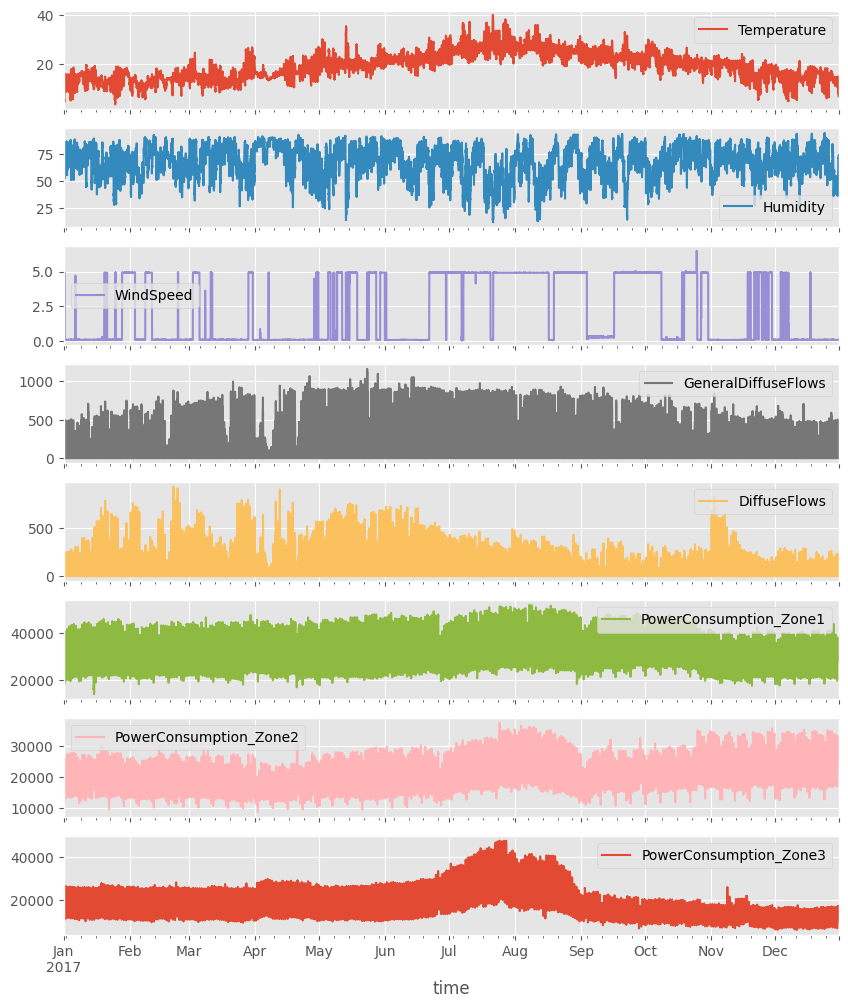

In [17]:
df.plot(subplots=True,figsize=(10,12))
plt.show()

Ahora de un intervalo mas pequeño de los datos

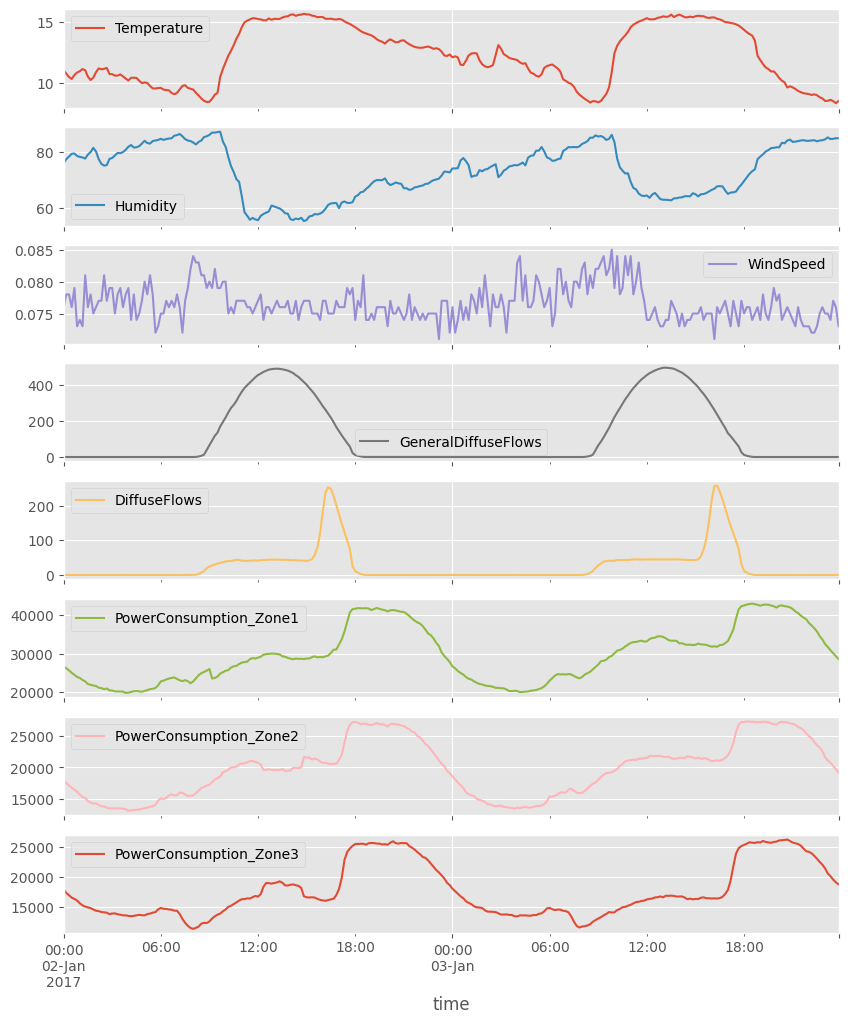

In [18]:
df['2017-01-02':'2017-01-03'].plot(subplots=True,figsize=(10,12))
plt.show()

### Graficas de distribución de probabilidad de cada variables

In [19]:
def hist_box(data,bins):
    mean=data.mean()
    median=data.median()
    mode=data.mode()[0]
    std=data.std()
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    sns.histplot(data,ax=ax[0],kde=True,bins=bins,color='blue')
    ax[0].axvline(mean,color='k',linestyle='dashed',linewidth=1.5,label='Mean')
    ax[0].axvline(median,color='r',linestyle='dashed',linewidth=1.5,label='Median')
    ax[0].axvline(mode,color='g',linestyle='dashed',linewidth=1.5,label='Mode')
    ax[0].text(ax[0].get_xlim()[1]*0.7,ax[0].get_ylim()[1]*0.9,rf'$\sigma$ = {std:.2f}')
    ax[0].legend()
    ax[0].set_title(f'Histogram of {data.name} and KDE')
    sns.boxplot(data,ax=ax[1],orient='v',color='red')
    ax[1].set_title(f'Boxplot of {data.name}')
    plt.show()

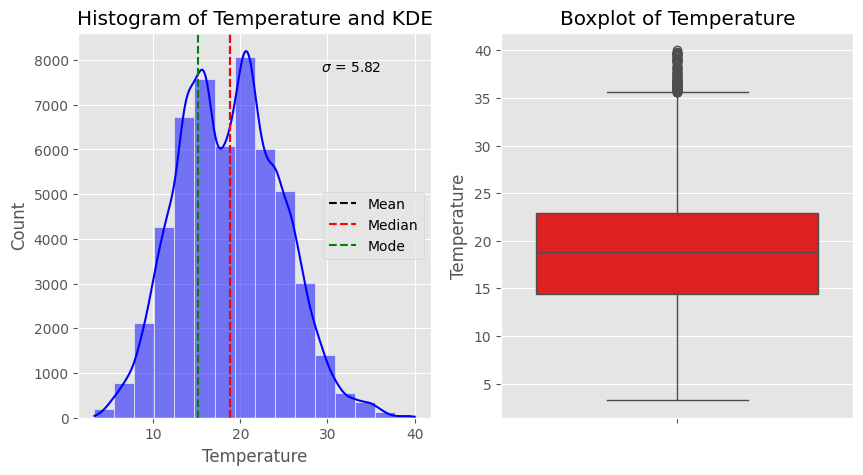

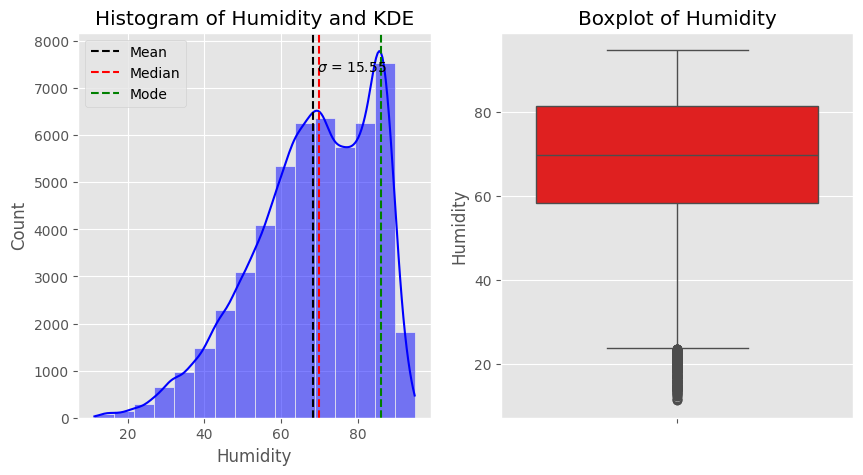

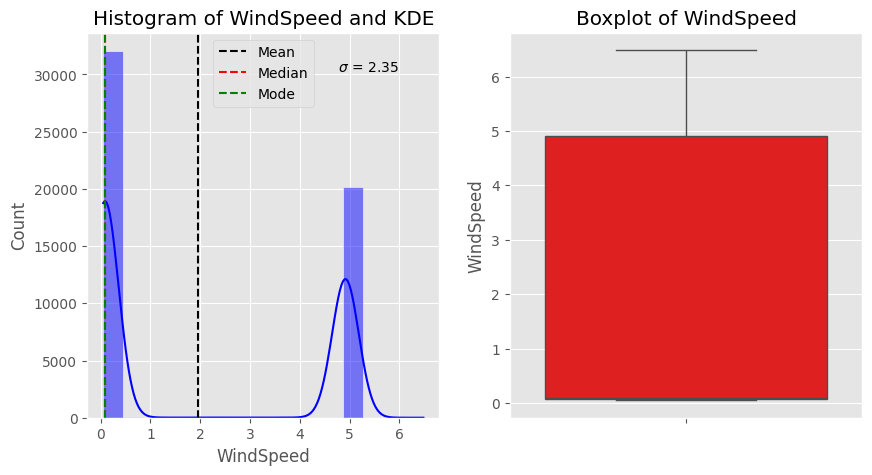

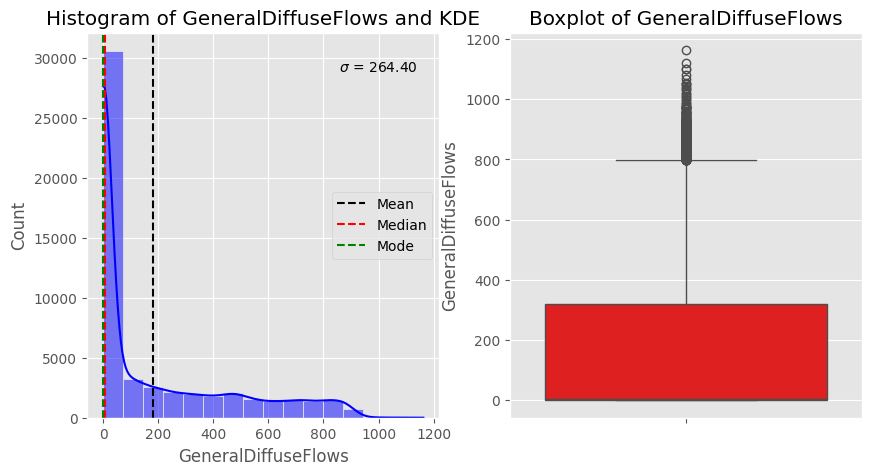

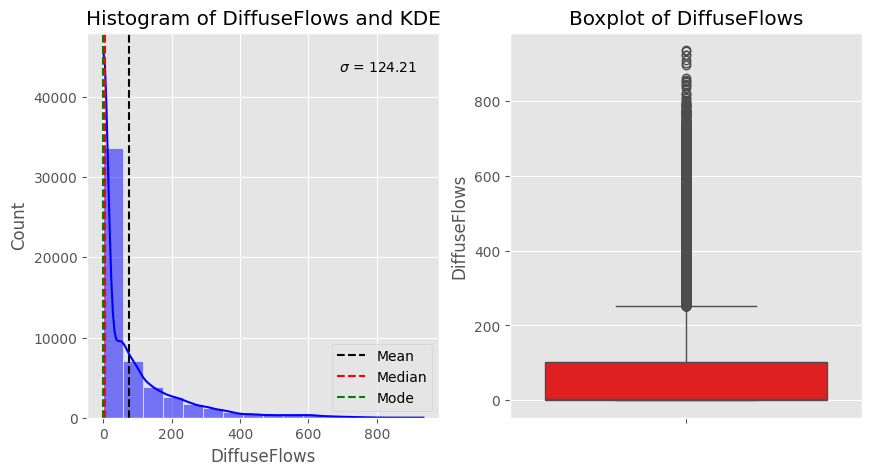

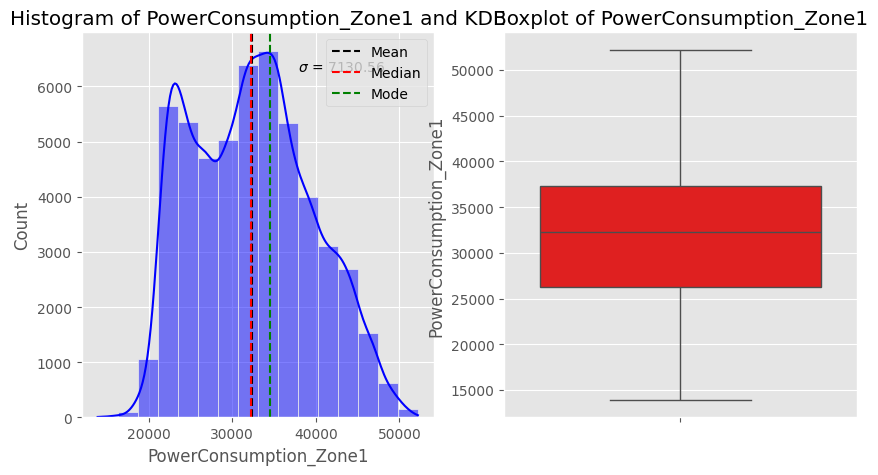

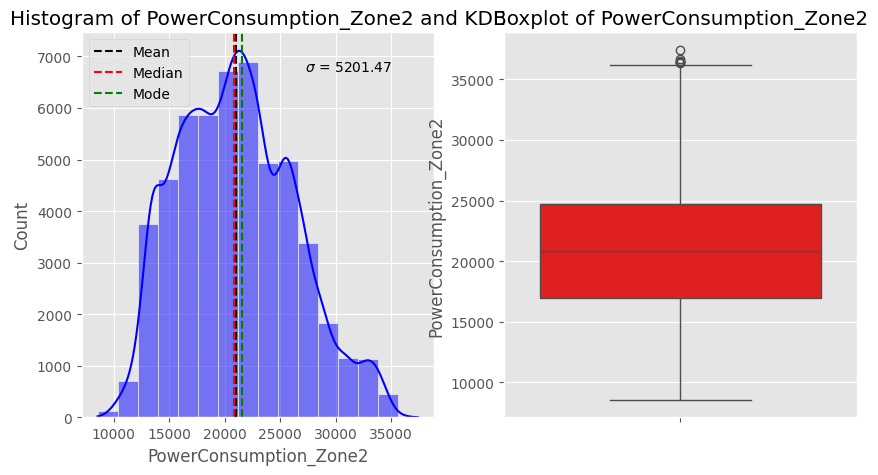

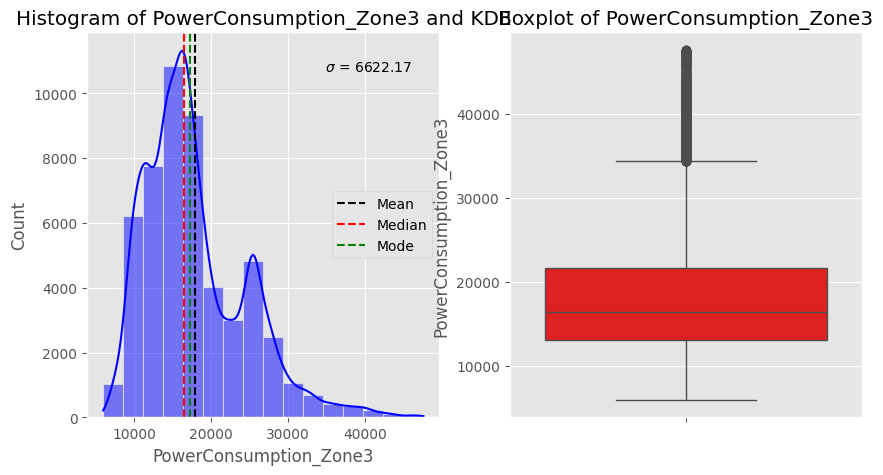

In [20]:
df.apply(lambda x: hist_box(x, bins));

In [21]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [22]:
print('Valores de sesgo para cada variable',df.apply(skew),sep='\n')

Valores de sesgo para cada variable
Temperature               0.196714
Humidity                 -0.625148
WindSpeed                 0.462410
GeneralDiffuseFlows       1.306936
DiffuseFlows              2.456836
PowerConsumption_Zone1    0.228857
PowerConsumption_Zone2    0.328867
PowerConsumption_Zone3    1.023842
dtype: float64


In [23]:
print('Valores de sesgo para cada variable',df.apply(kurtosis),sep='\n')

Valores de sesgo para cada variable
Temperature              -0.303407
Humidity                 -0.121962
WindSpeed                -1.783114
GeneralDiffuseFlows       0.402615
DiffuseFlows              7.002119
PowerConsumption_Zone1   -0.754097
PowerConsumption_Zone2   -0.437470
PowerConsumption_Zone3    1.086175
dtype: float64


El análisis de distribuciones reveló que algunas variables presentan sesgo y curtosis significativos, lo que indica desviaciones de la normalidad. Los histogramas y boxplots mostraron la presencia de valores atípicos en ciertas variables, lo que puede sugerir posibles fluctuaciones inusuales en el consumo de energía

###  QQ-Plot
Los *QQ-plot* o grafica de cuantiles cuantiles es una herramienta gráfica para comparar dos distribuciones de probabilidad al graficar sus cuantiles correspondientes uno contra el otro.Un quantil Un cuantil de una muestra, $q(f)$, es un valor para el que una fracción específica $f$ de los valores de los datos es menor que o igual a $q(f)$. Para nuestro estudio es relevante comparar si cada variable sigue una distribución normal dado que la mayoría de los métodos estadísticos y de aprendizaje de maquina asumen y/o benefician que los datos siguen una distribución normal.
Formalmente un *QQ-plot normal* se define asi :

- La gráfica de cuantiles-cuantiles normales es una gráfica de $y(i)$
(observaciones ordenadas) contra $q_{0,1}(f_i)$ , donde <br> $f_i=\frac{i-3/8}{n+1/4}$ y $q_{0,1}(f)=4.91[f^{0.14}−(1-f)^{0.14}]$ <br>

Una relación cercana a una línea recta de referencia sugiere que los datos provienen de una distribución  normal

In [24]:
from scipy.stats import norm
def qq_plot(data,distribution='normal'):
    data_sorted=np.sort(data.values)
    i=np.arange(1,len(data_sorted)+1)
    f_i=(i-(3/8))/(len(data_sorted)+(1/4))
    if distribution=='normal':
        q=norm.ppf(f_i)
        m,b=np.polyfit(q,data_sorted,1)
    fig,ax=plt.subplots(figsize=(10,5))
    ax.scatter(x=q,y=data_sorted,label='Cuantiles muestrales')
    sns.lineplot(x=q,y=(m*q)+b,ax=ax,label='linea de referencia',color='blue')
    ax.set_title(f'Q-Q plot of {data.name} and {distribution} distribution')
    ax.set_xlabel("Cuantiles teóricos")
    ax.set_ylabel("Cuantiles muestrales")
    plt.show() 

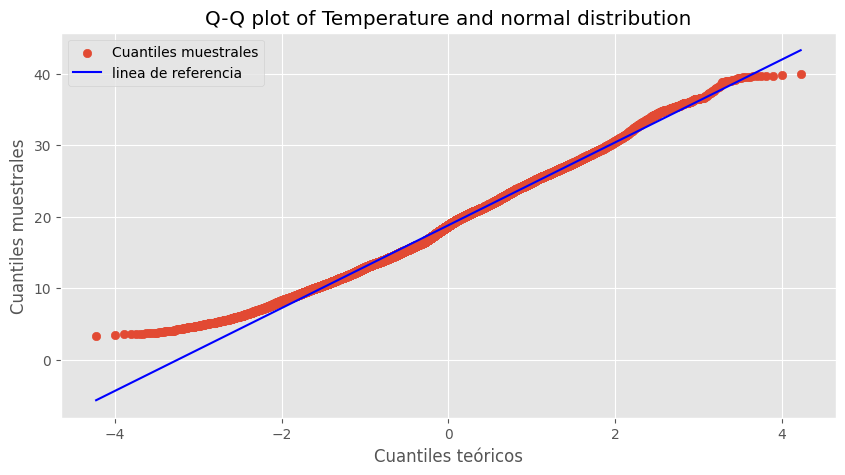

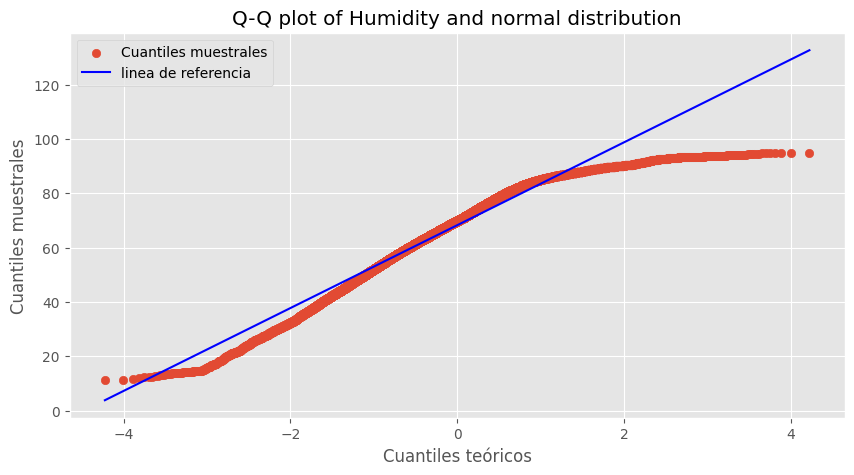

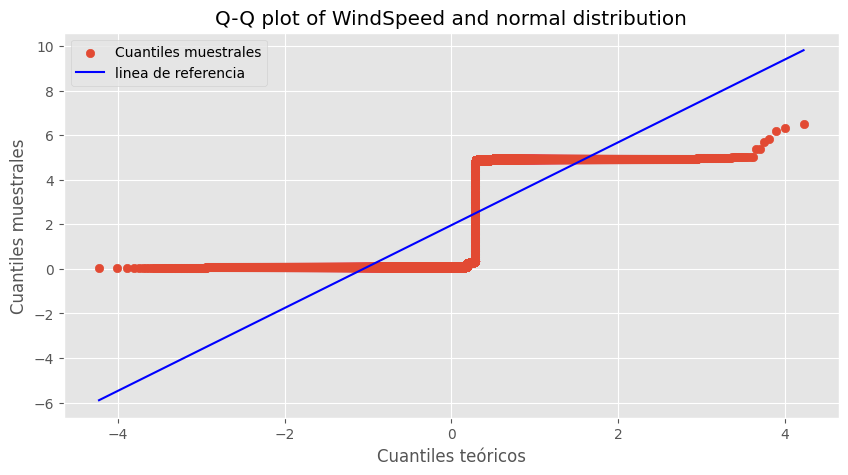

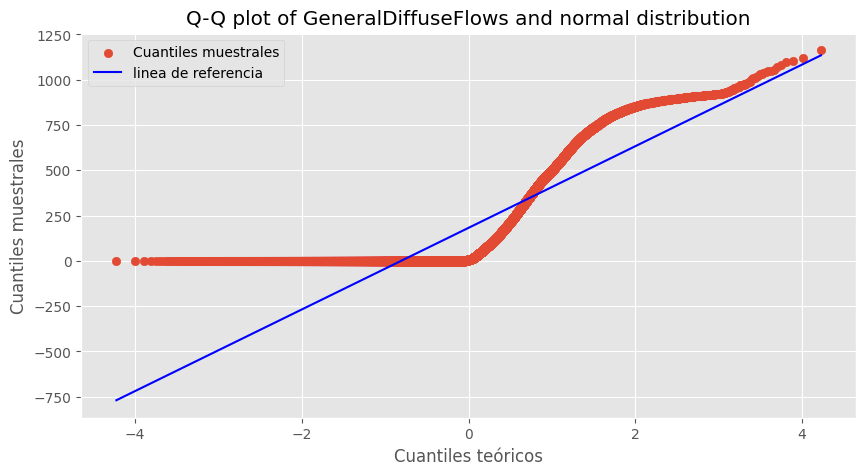

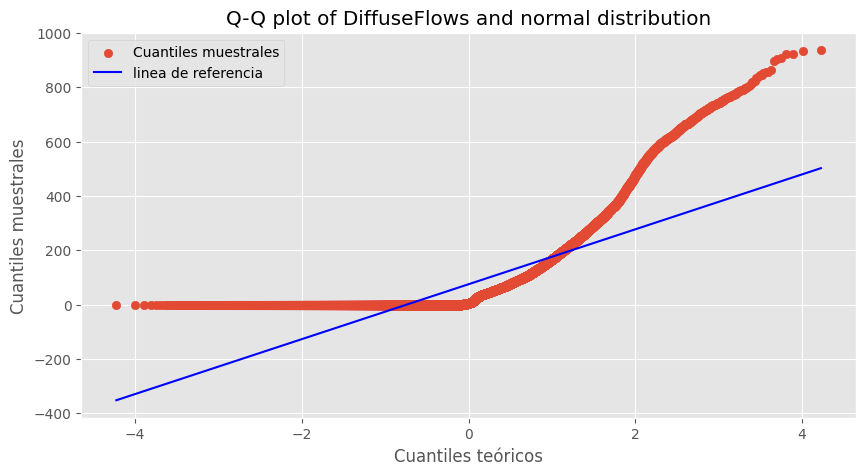

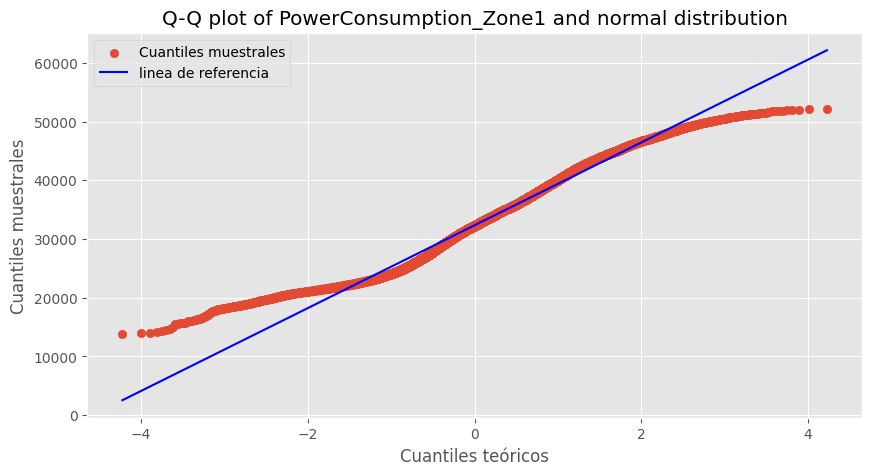

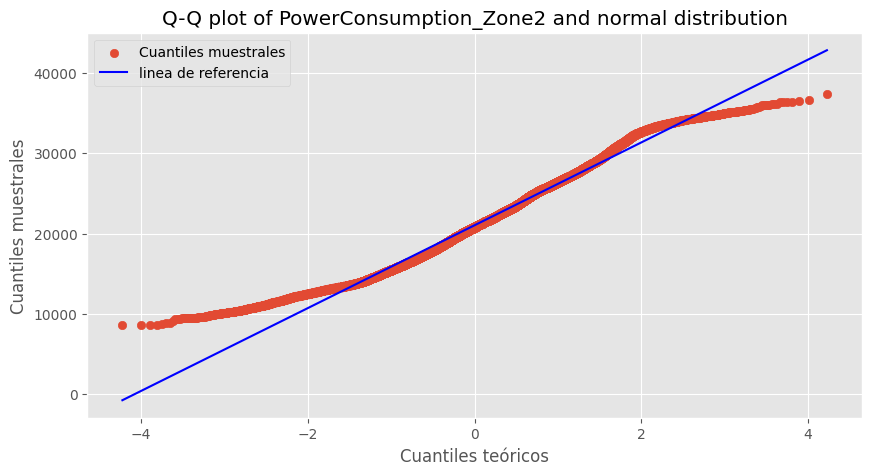

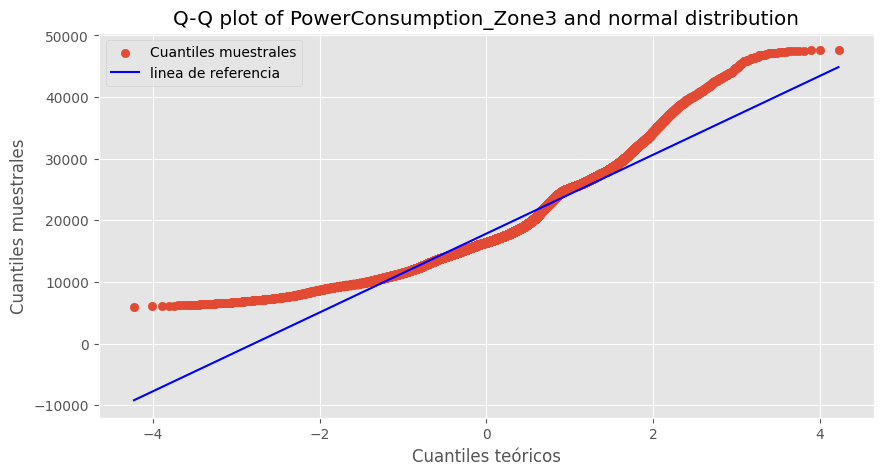

In [25]:
df.apply(qq_plot);

Las variables de temperatura , humendad y consumo de energia electrica en las 3 zonas de Tetouan se compararan con una distribución normal y es probable que sigan una distribución normal según lo visto en el grafico *QQ-plot*.

### Descomposición de la serie de tiempo
Un mejor analisis de los datos , se puede emplear mediante la descomposition de la serie de tiempo en sus componentes principales :
- tendencia : Representa los cambios lentos que van ocurriendo en la serie de tiempo a medida que transcurre , es el componente que hace que la serie de tiempo aumente o disminuya en el tiempo.
- estacionalidad : Son los ciclos que ocurren repetidamente alrededor de una periodo de tiempo fijo
- residuales : Es todo aqueño que no se puede explicar por la tendencia y la estacionalidad , es como un error aleatorio en la serie de tiempo , tambien es conocido como ruido blanco.

Se puede expresar formalmente asi : data una serie de tiempo $y_t$ , se puede descomponer en sus componentes principales de manera aditivas asi :
 <br>$y_t = T_t + S_t + R_t$ , donde $T_t$ es la tendencia , $S_t$ es la estacionalidad y $R_t$ es el residuo.

Un primere acercamiento se puede realizar con la función ```seasonal_decompose``` de la libreria ```statsmodels``` , esta función realiza la descomposición de la serie de tiempo en sus componentes principales.

<Axes: xlabel='time'>

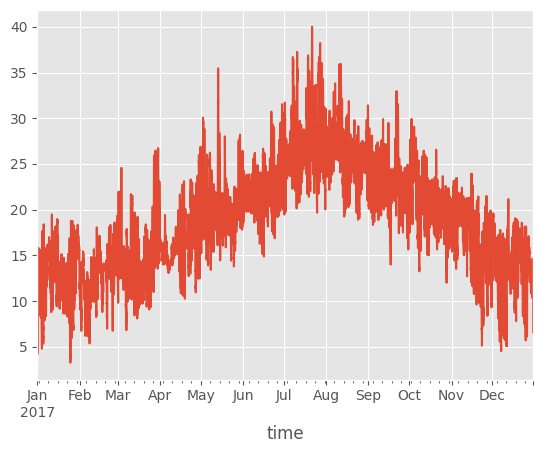

In [26]:
df['Temperature'].plot()

In [27]:
def descompose_time_series(data,period:int):
    decomposition=seasonal_decompose(data,model='additive',period=period)
    trend=decomposition.trend
    seasonal=decomposition.seasonal
    residual=decomposition.resid
    fig,ax=plt.subplots(4,1,figsize=(10,10))
    data.plot(ax=ax[0],title=f'Original {data.name}',color='black')
    trend.plot(ax=ax[1],title='Trend',color='Red')
    seasonal.plot(ax=ax[2],title='Seasonal',color='Green')
    residual.plot(ax=ax[3],title='Residual',color='Blue')
    plt.tight_layout()
    plt.show()

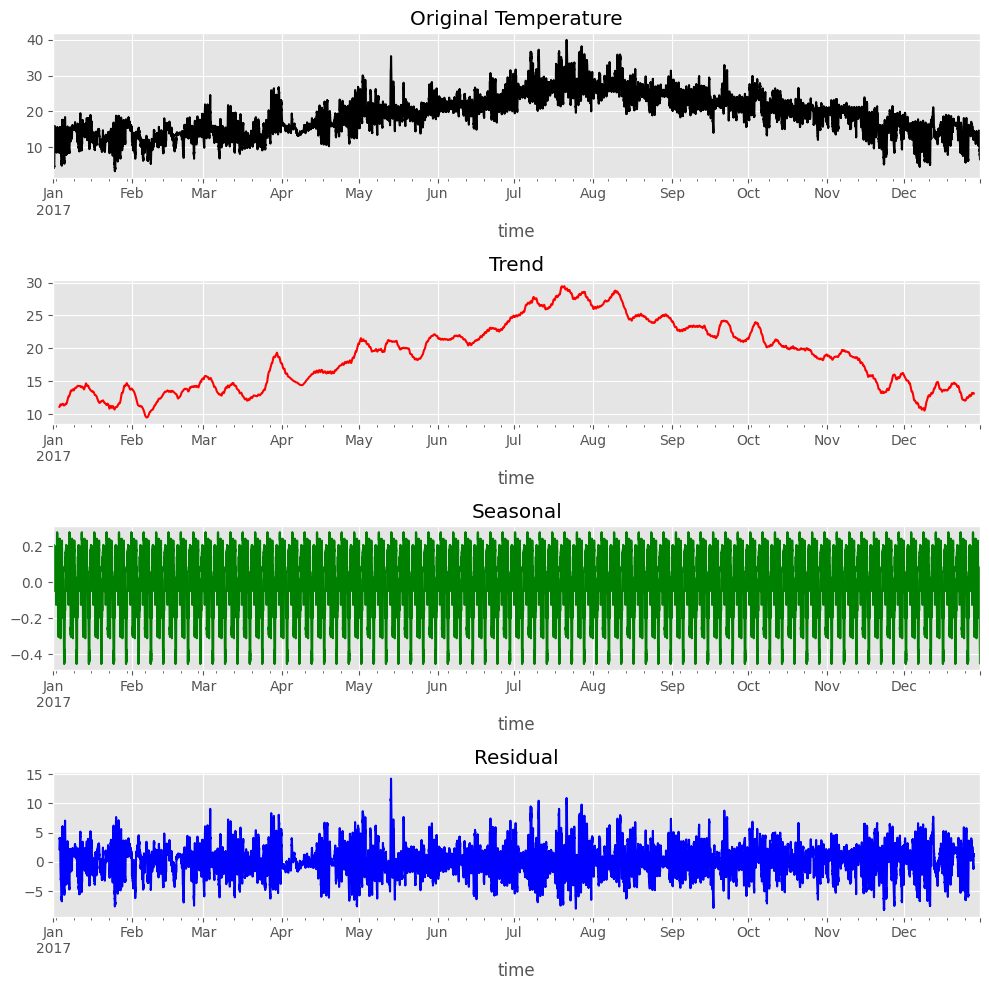

In [28]:
descompose_time_series(df['Temperature'],period=700)

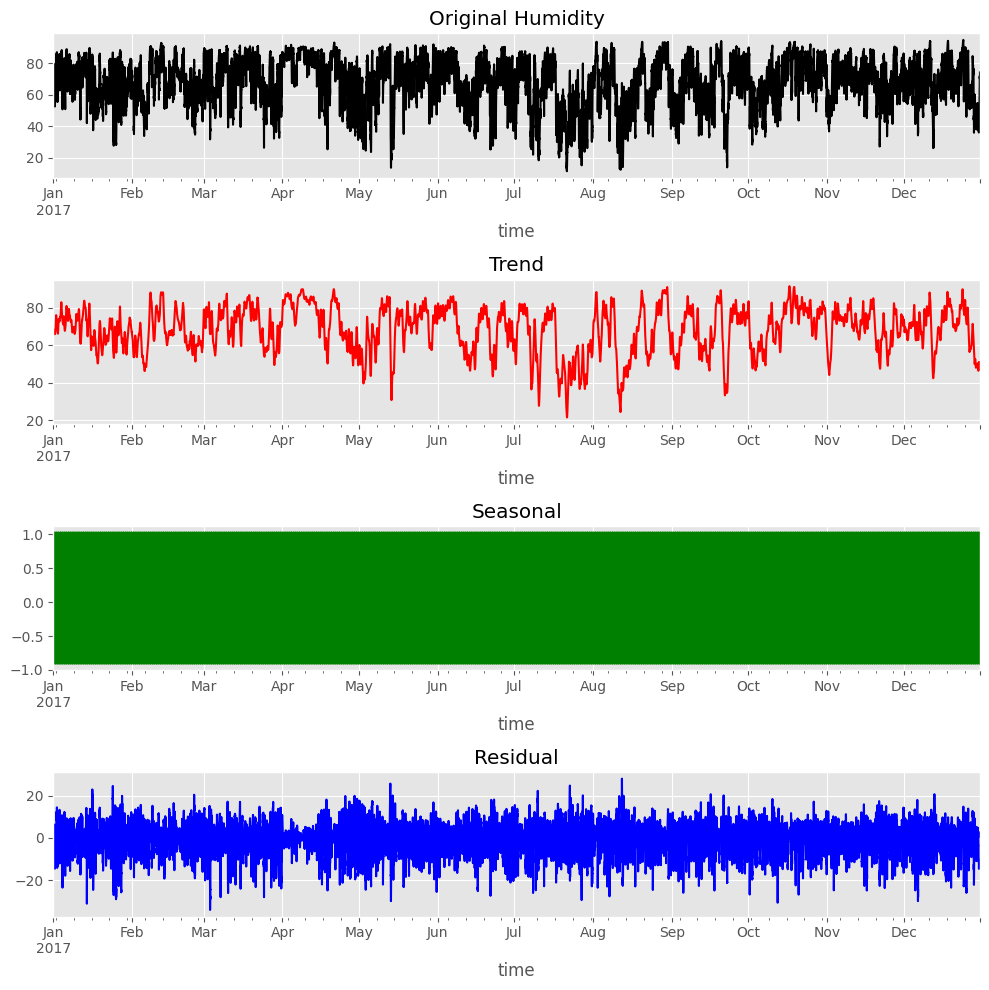

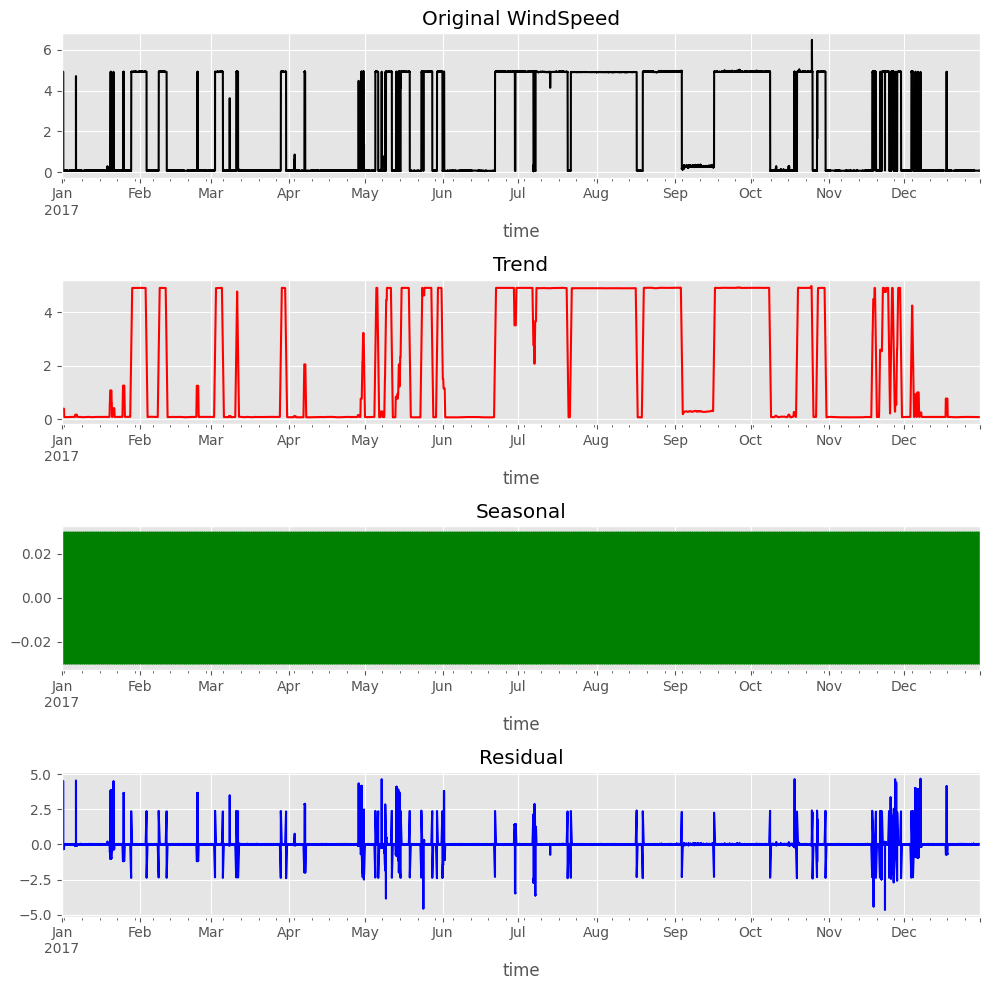

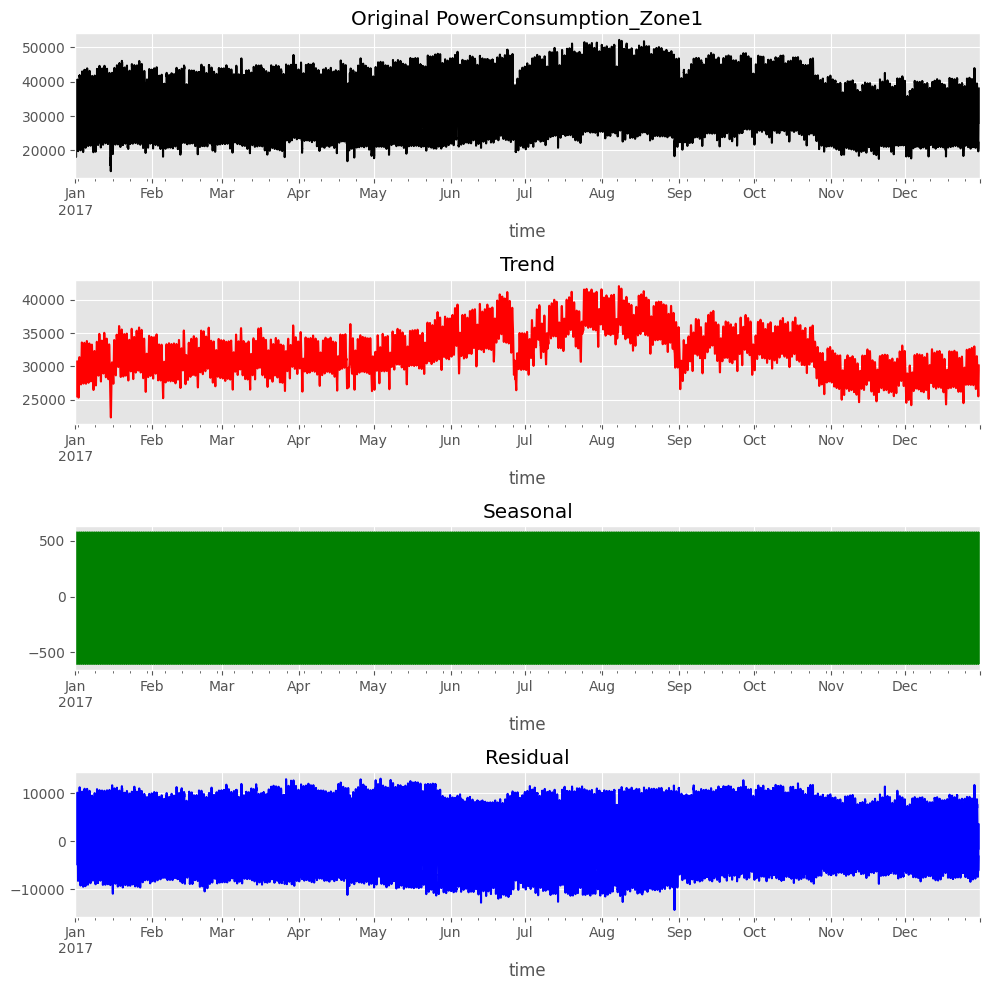

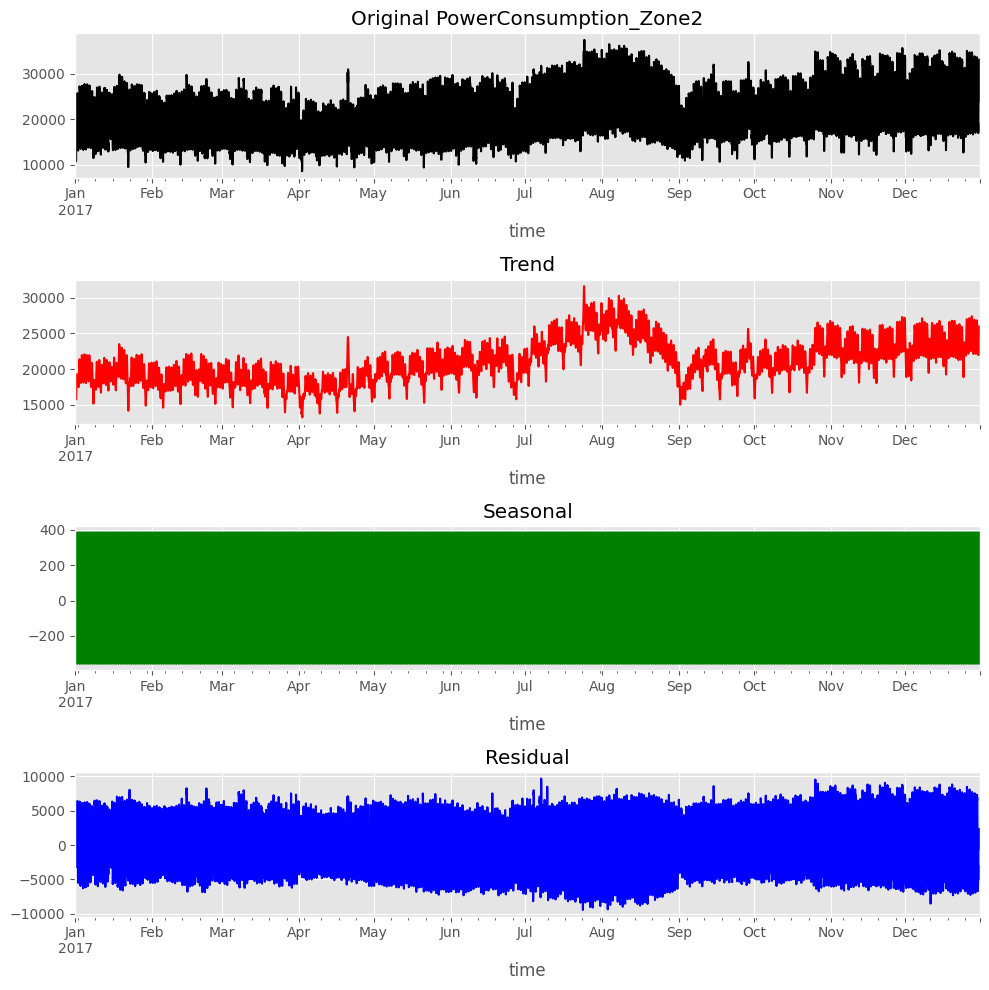

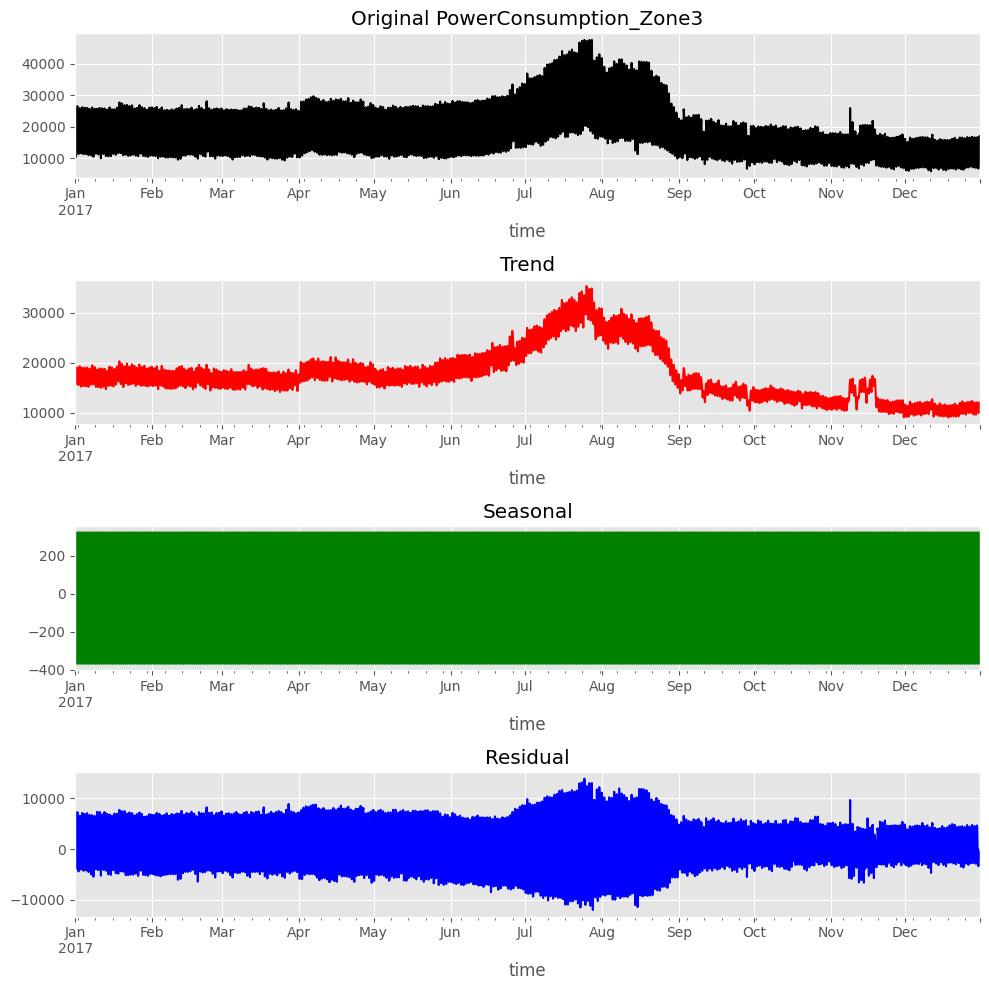

In [29]:
df[['Humidity','WindSpeed','PowerConsumption_Zone1','PowerConsumption_Zone2','PowerConsumption_Zone3']].apply(descompose_time_series,period=108);

## 3. Variables de mayor interés para estimación

Una matriz de correlación empleando el coeficiente de correlación de Pearson para identificar las variables que tienen una mayor correlación con el consumo de energía eléctrica en las tres zonas de Tetouan , puede ser un buen indicador para seleccionar las variables de mayor interés para la estimación.

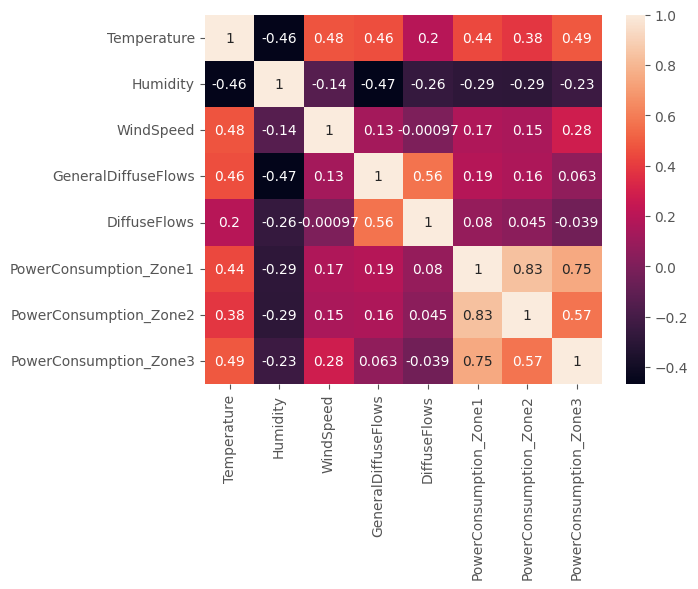

In [30]:
matriz_correlacion=df.corr()
sns.heatmap(matriz_correlacion,annot=True)
plt.show()

## 4. Conclusión Analisis Exploratorio

En esta primera entrega del proyecto de estadística, se realizó un análisis exploratorio del conjunto de datos Electric Power Consumption, que representa el consumo eléctrico en Tetouan, Marruecos, durante 2017.

Se examinaron distribuciones y parámetros estadísticos de las variables, incluyendo medidas de tendencia central y dispersión. Además, se utilizaron histogramas y boxplots para visualizar la distribución de los datos y detectar posibles anomalías. La descomposición de la serie de tiempo permitió identificar patrones de tendencia y estacionalidad en el consumo de energía.

Habiendo realizado este análisis preliminar podemos entender la naturaleza de los datos en el dataset. A partir de esto se espera aplicar modelos predictivos o técnicas avanzadas para entender mejor las fluctuaciones en el consumo eléctrico y sus posibles factores determinantes.


## 5. Analisis de la serie de tiempo

Antes de pasar al analisis es necesario realizar algunas transformaciones en los datos para facilitar el analisis de la serie de tiempo.

In [31]:
df['year']=df.index.year
df['month']=df.index.month
df['day']=df.index.day
df['hour']=df.index.hour
df['minute']=df.index.minute
df['dayofweek']=df.index.dayofweek+1

Ahora se presenta un analisis mas formal de los datos.
El primer paso es revisar graficamente cada una de las variables en el tiempo de manera separada,  para identificar patrones y comportamientos en los datos 

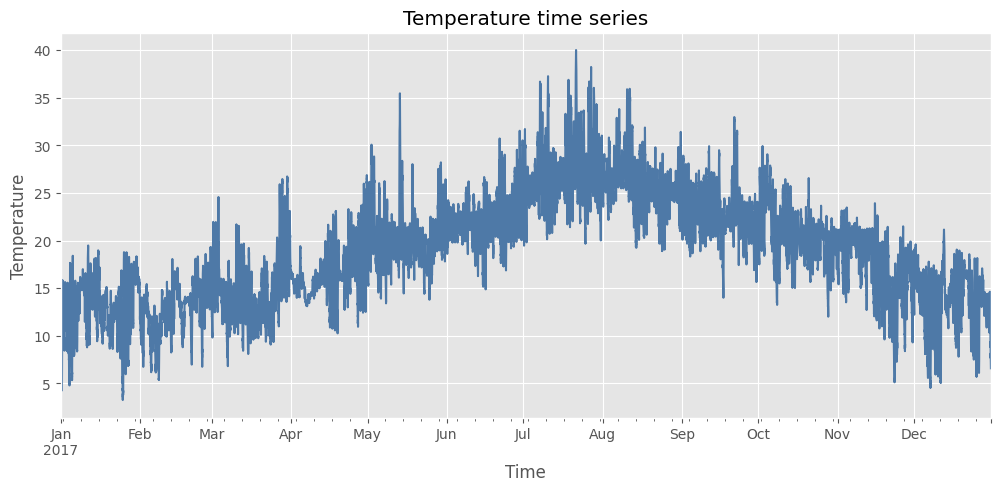

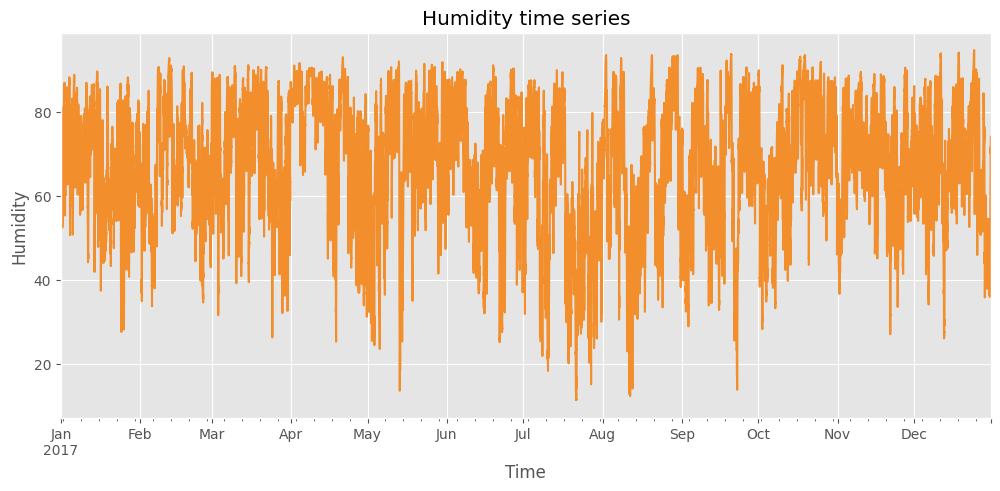

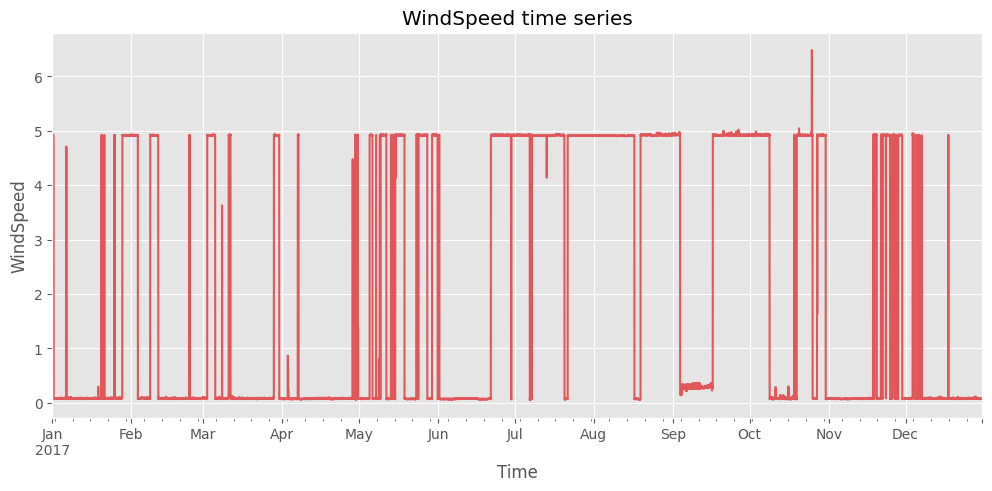

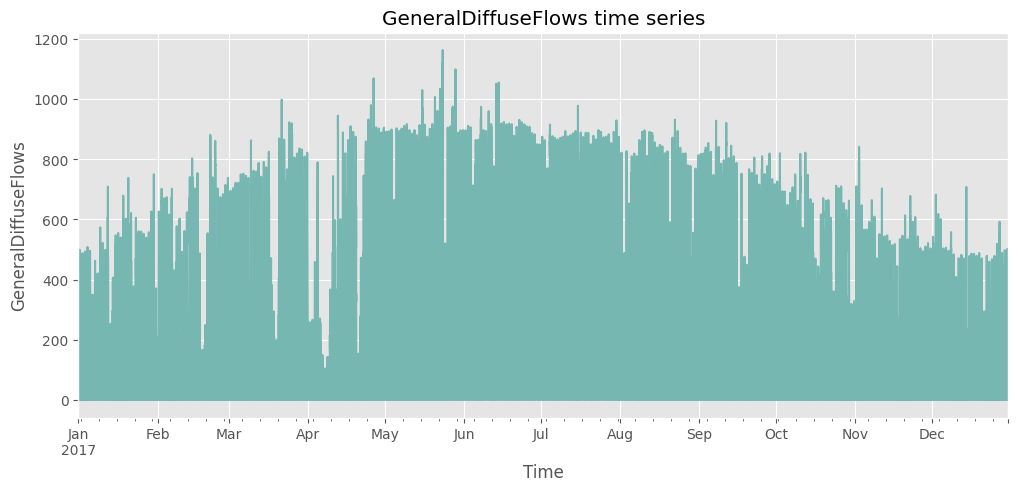

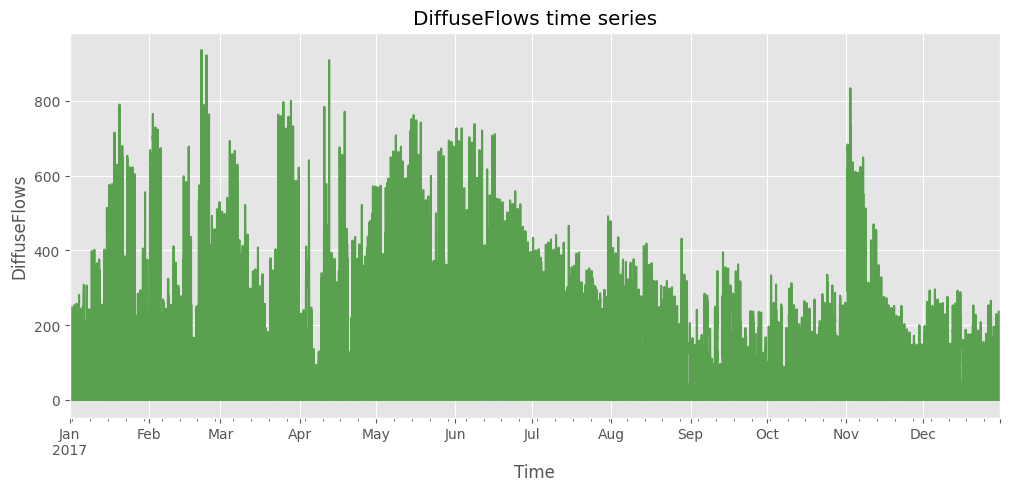

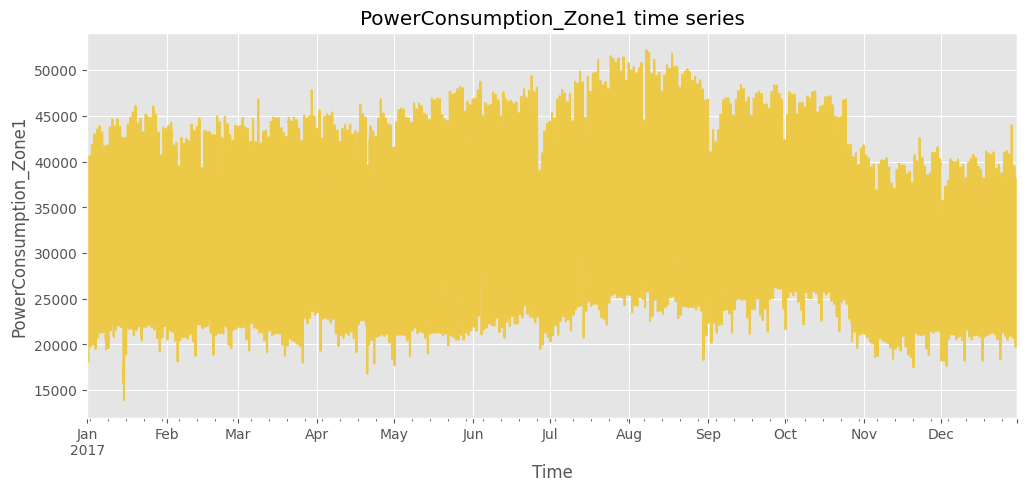

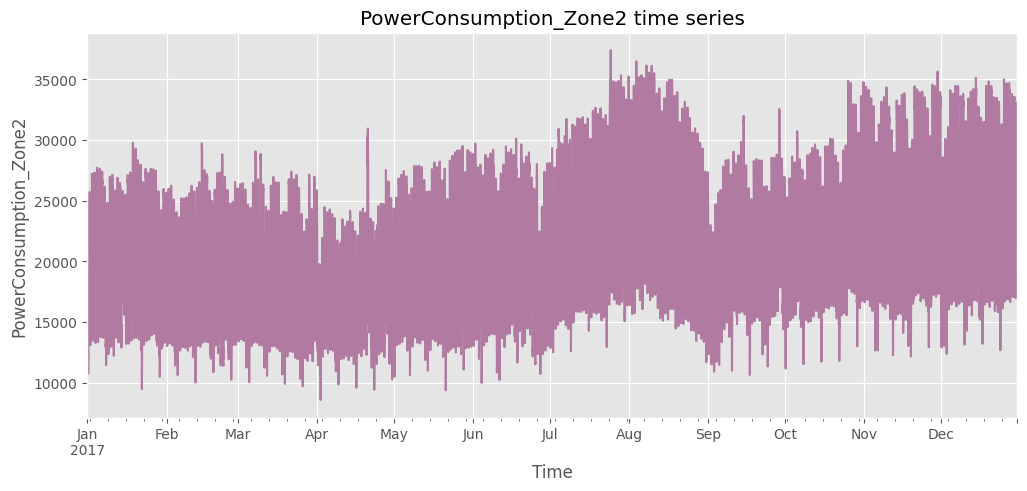

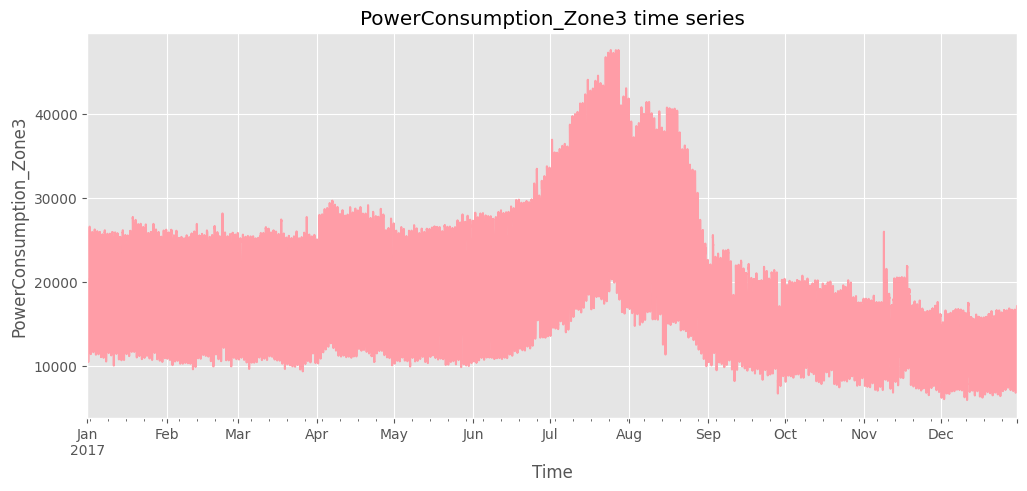

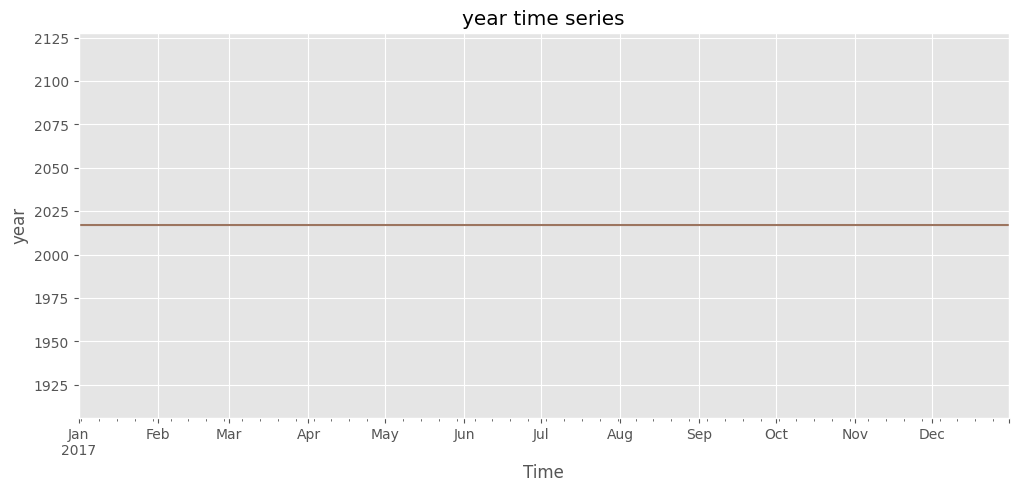

In [32]:
colors=["#4E79A7","#F28E2B","#E15759","#76B7B2","#59A14F","#EDC948","#B07AA1","#FF9DA7","#9C755F"]
for column,item in zip(df.columns,colors):
    df[column].plot(figsize=(12,5),color=item)
    plt.title(f'{column} time series')
    plt.ylabel(column)
    plt.xlabel('Time')
    plt.show()

Actividad
Presentacion de 3 preguntas de intervalos de confianza basados en los
datos que eligieron para su proyecto final.
La presentacion sera el 26 de Marzo en la hora de clase.
Tiempo de la presentacion: 10 minuntos.
Esquema propuesto:
- Explicacion breve del dataset.
- Breve analisis de los datos suceptibles de estadistica.
- Las 3 preguntas para intervalos de confianza.

## Intervalos de Confianza

In [37]:
df['hour']

time
2017-01-01 00:00:00     0
2017-01-01 00:10:00     0
2017-01-01 00:20:00     0
2017-01-01 00:30:00     0
2017-01-01 00:40:00     0
                       ..
2017-12-30 23:10:00    23
2017-12-30 23:20:00    23
2017-12-30 23:30:00    23
2017-12-30 23:40:00    23
2017-12-30 23:50:00    23
Name: hour, Length: 52416, dtype: int32

In [57]:
# Calculo de los intervalos de confianza de la media del consumo electrico por zona teniendo en cuenta las estaciones del ano y si es de dia u noche
estaciones = {
    'primavera': df[(df['month'] > 3) & (df['month'] < 7)],
    'verano': df[(df['month'] > 6) & (df['month'] < 10)],
    'otono': df[(df['month'] > 9) & (df['month'] <= 12)],
    'invierno': df[(df['month'] >= 1) & (df['month'] < 4)]
}

# Definir períodos de día y noche con rangos corregidos
periodos = {
    'primavera': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 5)]
    },
    'verano': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 20)],
        'noche': lambda df: df[(df['hour'] >= 20) | (df['hour'] <= 5)]
    },
    'otono': {
        'dia': lambda df: df[(df['hour'] > 5) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 5)]
    },
    'invierno': {
        'dia': lambda df: df[(df['hour'] > 7) & (df['hour'] < 19)],
        'noche': lambda df: df[(df['hour'] >= 19) | (df['hour'] <= 7)]
    }
}

# Definir zonas de consumo
zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

# Nivel de confianza
confianza = 0.99

# Diccionario para almacenar los intervalos de confianza
intervalos_confianza = {}

# Iterar sobre estaciones y períodos (día/noche)
for estacion, df_estacion in estaciones.items():
    intervalos_confianza[estacion] = {}
    
    for periodo, filtro in periodos[estacion].items():
        df_periodo = filtro(df_estacion)  # Filtrar por día o noche
        
        intervalos_confianza[estacion][periodo] = {}
        
        for zone in zones:
            data = df_periodo[zone].dropna()  # Eliminar valores nulos
            n = len(data)  # Tamaño de la muestra
            
            if n > 1:  # Evitar errores con muestras vacías o de tamaño 1
                media = np.mean(data)
                std_error = stats.sem(data)  # Error estándar
                
                # Calcular intervalo de confianza con t-student
                intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)
            else:
                intervalo = (None, None)  # Si no hay datos suficientes, asignar None
            
            intervalos_confianza[estacion][periodo][zone] = intervalo

# Mostrar resultados
for estacion, periodos in intervalos_confianza.items():
    for periodo, zonas in periodos.items():
        print(f"\n{estacion.upper()} - {periodo.upper()}")
        for zone, intervalo in zonas.items():
            print(f"{zone}: {intervalo}")


PRIMAVERA - DIA
PowerConsumption_Zone1: (np.float64(31324.316000466133), np.float64(31623.12053694159))
PowerConsumption_Zone2: (np.float64(18845.938434571977), np.float64(19052.993895077216))
PowerConsumption_Zone3: (np.float64(16671.88198046594), np.float64(16866.25597768537))

PRIMAVERA - NOCHE
PowerConsumption_Zone1: (np.float64(33904.74747098784), np.float64(34481.75527158625))
PowerConsumption_Zone2: (np.float64(19831.539172862816), np.float64(20179.266233403578))
PowerConsumption_Zone3: (np.float64(21162.43244664632), np.float64(21534.169235643723))

VERANO - DIA
PowerConsumption_Zone1: (np.float64(35215.21376444199), np.float64(35565.77319124125))
PowerConsumption_Zone2: (np.float64(23191.46284483545), np.float64(23468.811071274795))
PowerConsumption_Zone3: (np.float64(21540.59061316344), np.float64(21969.96204172657))

VERANO - NOCHE
PowerConsumption_Zone1: (np.float64(34748.31322212007), np.float64(35314.97361194877))
PowerConsumption_Zone2: (np.float64(22398.868259256185), 

In [58]:
#  Calculo de los intervalos de confianza siendo mas general
dia = df[(df['hour']>6) & (df['hour']<20)] # En general el sol sale a las 7 a.m y se pone a las 7 p.m (19:00)
noche=  df[(df['hour']<=6) | (df['hour']>=20)]

zones = ['PowerConsumption_Zone1', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3']

confianza = 0.99

intervalos_dia = {}
for zone in zones:
    data = dia[zone].dropna()  # Eliminar valores nulos
    n = len(data)  # Tamaño de la muestra
    media = np.mean(data)
    std_error = stats.sem(data)  # Error estándar
    
    # Usar t-student si n es pequeño, normal si n es grande
    intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)
    
    intervalos_dia[zone] = intervalo

intervalos_noche = {}
for zone in zones:
    data = noche[zone].dropna()  # Eliminar valores nulos
    n = len(data)  # Tamaño de la muestra
    media = np.mean(data)
    std_error = stats.sem(data)  # Error estándar
    
    # Usar t-student si n es pequeño, normal si n es grande
    intervalo = stats.t.interval(confianza, df=n-1, loc=media, scale=std_error)
    
    intervalos_noche[zone] = intervalo

print('Intervalos de confianza del consumo de energia por zona en el dia')
for zone, intervalo in intervalos_dia.items():
    print(f"{zone}: Media = {np.mean(dia[zone]):.2f}, Intervalo de confianza al 99% = {intervalo}")

print('Intervalos de confianza del consumo de energia por zona en la noche')
for zone, intervalo in intervalos_noche.items():
    print(f"{zone}: Media = {np.mean(noche[zone]):.2f}, Intervalo de confianza al 99% = {intervalo}")


Intervalos de confianza del consumo de energia por zona en el dia
PowerConsumption_Zone1: Media = 33544.13, Intervalo de confianza al 99% = (np.float64(33456.98803739811), np.float64(33631.27003891422))
PowerConsumption_Zone2: Media = 22007.88, Intervalo de confianza al 99% = (np.float64(21938.09851978158), np.float64(22077.6549124325))
PowerConsumption_Zone3: Media = 17344.40, Intervalo de confianza al 99% = (np.float64(17251.375293658613), np.float64(17437.41908102461))
Intervalos de confianza del consumo de energia por zona en la noche
PowerConsumption_Zone1: Media = 30927.78, Intervalo de confianza al 99% = (np.float64(30789.896564244875), np.float64(31065.669986670044))
PowerConsumption_Zone2: Media = 19901.62, Intervalo de confianza al 99% = (np.float64(19807.592746923376), np.float64(19995.647374227145))
PowerConsumption_Zone3: Media = 18415.69, Intervalo de confianza al 99% = (np.float64(18296.645329432034), np.float64(18534.73390794975))
